## Installing Important Libraries

In [76]:
# !pip install pandas
# !pip install -U scikit-learn
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn
# !pip install statsmodels

## Importing & Configuring Libs

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger
pd.set_option('display.max_columns',2000) # show all columns in jupyter
pd.set_option('display.max_rows', 100) # display 100 at least rows

In [78]:
# import sys
# sys.path.append("/Users/apple/.pyenv/versions/3.5.4/lib/python3.5/site-packages")
import seaborn as sns

## Loading Data

#### After understandig business context and use case, some features are candidates to affect the target of the use case.
#### out of about 1900 features, only suspected features (inputs and outputs) will be loaded to examine by graphs and statistics

In [79]:
colsToLoad =["INSTNM","ADM_RATE","ADM_RATE_ALL","ACTCMMID","ACTENMID","ACTMTMID","ACTWRMID","SAT_AVG","SAT_AVG_ALL","UGDS","HIGHDEG", "CONTROL", "TUITFTE", "INEXPFTE", "AVGFACSAL", "COSTT4_P",
             "COSTT4_A", "PCTFLOAN", "PCTPELL", "COMP_ORIG_YR2_RT", "MEDIAN_HH_INC","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN","UGDS_AIAN","UGDS_NHPI","UGDS_2MOR","UGDS_NRA","UGDS_UNKN","PPTUG_EF","COSTT4_A","COSTT4_P","TUITIONFEE_IN","TUITIONFEE_OUT","TUITIONFEE_PROG","TUITFTE","INEXPFTE","AVGFACSAL","PCTPELL","DEATH_YR3_RT","COMP_ORIG_YR3_RT","LOAN_DEATH_YR3_RT","LOAN_COMP_ORIG_YR3_RT","DEATH_YR4_RT","COMP_ORIG_YR4_RT","COMPL_RPY_1YR_RT","NONCOM_RPY_1YR_RT","AGE_ENTRY","COUNT_NWNE_P10","COUNT_WNE_P10","MN_EARN_WNE_P10","MD_EARN_WNE_P10","COMPL_RPY_1YR_RT","NONCOM_RPY_1YR_RT","COMPL_RPY_3YR_RT","NONCOM_RPY_3YR_RT","COMPL_RPY_5YR_RT","NONCOM_RPY_5YR_RT","COMPL_RPY_7YR_RT","NONCOM_RPY_7YR_RT"]
scoreCardDF = pd.read_csv("CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv", index_col="INSTNM",usecols=colsToLoad)

## General Understaning of Data

In [80]:
scoreCardDF.head()

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,COMP_ORIG_YR2_RT,DEATH_YR3_RT,COMP_ORIG_YR3_RT,LOAN_DEATH_YR3_RT,LOAN_COMP_ORIG_YR3_RT,DEATH_YR4_RT,COMP_ORIG_YR4_RT,COMPL_RPY_1YR_RT,NONCOM_RPY_1YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,COMPL_RPY_5YR_RT,NONCOM_RPY_5YR_RT,COMPL_RPY_7YR_RT,NONCOM_RPY_7YR_RT,AGE_ENTRY,MEDIAN_HH_INC,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10
INSTNM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,4,1,0.8989,0.8989,17.0,17.0,17.0,NaN,823.0,823.0,4051.0,0.0279,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,18888.0,NaN,7182.0,12774.0,NaN,9063.0,7459.0,7079.0,0.7115,0.8204,0.034958602,PrivacySuppressed,0.097451274,PrivacySuppressed,0.087332809,PrivacySuppressed,0.241845664,0.3075801749,0.1213692946,0.388185654,0.1768901569,0.5305514158,0.2299150882,0.7553324969,0.4143646409,20.540410133,NaN,246,1741,34300,29900
University of Alabama at Birmingham,4,1,0.8673,0.8673,25.0,26.0,23.0,NaN,1146.0,1146.0,11200.0,0.5987,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,19990.0,NaN,7206.0,16398.0,NaN,9033.0,17208.0,10170.0,0.3505,0.5397,0.150529204,PrivacySuppressed,0.333945628,PrivacySuppressed,0.332664527,PrivacySuppressed,0.422933112,0.578436134,0.3365384615,0.6351660939,0.4240231548,0.7312626604,0.5116761806,0.8288419519,0.6054718477,23.45881476,NaN,470,3474,46400,40200
Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,0.2919,0.4224,0.0093,0.0031,0.0031,0.0031,0.0000,0.0000,0.2671,0.3727,12300.0,NaN,6870.0,6870.0,NaN,12057.0,5123.0,3849.0,0.6839,0.7629,0.058823529,PrivacySuppressed,0.161849711,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.209580838,0.3859649123,0.1542699725,0.6226415094,0.3043478261,0.5192307692,0.4144144144,PrivacySuppressed,PrivacySuppressed,33.925581395,NaN,57,168,46100,40100
University of Alabama in Huntsville,4,1,0.8062,0.8062,26.0,26.0,25.0,NaN,1180.0,1180.0,5525.0,0.7012,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,20306.0,NaN,9192.0,21506.0,NaN,8322.0,9352.0,9341.0,0.3281,0.4728,0.157939189,PrivacySuppressed,0.284602076,PrivacySuppressed,0.283109405,PrivacySuppressed,0.393046107,0.639589169,0.3486956522,0.7177142857,0.3818860878,0.7959731544,0.474012474,0.8810810811,0.6389140271,24.10127697,NaN,188,1361,50500,45600
Alabama State University,4,1,0.5125,0.5125,17.0,17.0,17.0,NaN,830.0,830.0,5354.0,0.0161,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,17400.0,NaN,8720.0,15656.0,NaN,7813.0,7393.0,6557.0,0.8265,0.8735,0.028949025,PrivacySuppressed,0.115574348,PrivacySuppressed,0.10949464,PrivacySuppressed,0.187935035,0.2118863049,0.0985550204,0.3057553957,0.1694465504,0.4466019417,0.2263289037,0.7058823529,0.3645320197,20.648575305,NaN,285,1977,29500,26700


In [81]:
scoreCardDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7804 entries, Alabama A & M University to Georgia Military College-Stone Mountain
Data columns (total 52 columns):
HIGHDEG                  7804 non-null int64
CONTROL                  7804 non-null int64
ADM_RATE                 2221 non-null float64
ADM_RATE_ALL             2486 non-null float64
ACTCMMID                 1344 non-null float64
ACTENMID                 1167 non-null float64
ACTMTMID                 1168 non-null float64
ACTWRMID                 300 non-null float64
SAT_AVG                  1422 non-null float64
SAT_AVG_ALL              1532 non-null float64
UGDS                     7091 non-null float64
UGDS_WHITE               7091 non-null float64
UGDS_BLACK               7091 non-null float64
UGDS_HISP                7091 non-null float64
UGDS_ASIAN               7091 non-null float64
UGDS_AIAN                7091 non-null float64
UGDS_NHPI                7091 non-null float64
UGDS_2MOR                7091 non-null float64

In [82]:
scoreCardDF.shape

(7804, 52)

In [83]:
scoreCardDF.describe()

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,MEDIAN_HH_INC
count,7804.000000,7804.000000,2221.000000,2486.000000,1344.000000,1167.000000,1168.000000,300.000000,1422.000000,1532.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7091.000000,7072.000000,4139.000000,2543.000000,4506.000000,4287.000000,2748.000000,7362.000000,7362.000000,4654.000000,7063.000000,7063.000000,0.0
mean,2.180420,2.216427,0.683853,0.692173,23.125744,22.730077,22.590753,7.736667,1056.829817,1061.605091,2332.675363,0.517640,0.187379,0.156696,0.032716,0.013823,0.004473,0.022181,0.014683,0.049281,0.224013,24355.081662,18481.605977,13857.479361,16305.035223,14910.383916,9962.513447,6934.007335,6014.295875,0.528684,0.531370,NaN
std,1.317085,0.837223,0.208593,0.202677,3.421468,3.764050,3.395695,1.054052,131.817989,129.958729,5444.538996,0.287867,0.222103,0.220069,0.073006,0.068906,0.031648,0.032064,0.045770,0.101418,0.245676,12170.180307,6358.082813,10523.846885,9790.016165,7127.349341,8404.164486,8850.919248,2264.836833,0.224824,0.285514,NaN
min,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.000000,666.000000,666.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4157.000000,3057.000000,0.000000,80.000000,263.000000,0.000000,0.000000,269.000000,0.000000,0.000000,NaN
25%,1.000000,1.000000,0.554300,0.563350,21.000000,20.000000,21.000000,7.000000,972.000000,980.000000,121.000000,0.278950,0.035100,0.025600,0.002300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14151.500000,14164.500000,5293.000000,8918.000000,11199.500000,4365.500000,3275.250000,4471.250000,0.358300,0.343550,NaN
50%,2.000000,2.000000,0.701600,0.718500,23.000000,22.000000,22.000000,7.000000,1037.500000,1047.500000,431.000000,0.565000,0.099300,0.068500,0.011900,0.002700,0.000000,0.015500,0.000000,0.014600,0.150350,22865.000000,17786.000000,12094.000000,14257.000000,14600.000000,8758.000000,5193.000000,5794.000000,0.516500,0.592600,NaN
75%,4.000000,3.000000,0.835000,0.838784,25.000000,25.000000,24.000000,9.000000,1117.750000,1122.000000,1922.000000,0.759600,0.254550,0.187750,0.031150,0.007400,0.002400,0.030900,0.010150,0.048250,0.372700,30372.500000,22590.500000,18048.000000,20450.000000,17000.000000,13411.000000,7852.000000,7264.750000,0.704550,0.757600,NaN
max,4.000000,3.000000,1.000000,1.000000,34.000000,34.000000,35.000000,12.000000,1534.000000,1534.000000,166816.000000,1.000000,1.000000,1.000000,0.971800,1.000000,1.000000,1.000000,0.902400,1.000000,1.000000,74473.000000,89422.000000,64900.000000,64900.000000,88550.000000,207213.000000,307089.000000,23611.000000,1.000000,1.000000,NaN


# GRAPHS FROM HEBATALLAH ARE SUPPOSED TO BE HERE WITH DOCUMENTATION

## Choosing the best inputs/outputs based on statistical methods

#### Now We will try to choose the best input features and target variable based on correlation 
#### There is more than one output variable can be used as the target variable
#### suspected outputs are 
-COMPL_RPY_1YR_RT  (One-year repayment rate for completers)       
-COMPL_RPY_3YR_RT  (Three-year repayment rate for completers)    
-NONCOM_RPY_3YR_RT (Three-year repayment rate for non-completers)     
-NONCOM_RPY_5YR_RT (Five-year repayment rate for non-completers)      
-NONCOM_RPY_1YR_RT (One-year repayment rate for non-completers)       
-COMPL_RPY_5YR_RT  (Five-year repayment rate for completers)       
-NONCOM_RPY_7YR_RT (Seven-year repayment rate for non-completers)       
-COMPL_RPY_7YR_RT  (Seven-year repayment rate for completers)       
#### the output variable that has highest correlation with input features will be chosen as the target variable

since our problem is a regression problem, almost all suspected input features are float columns.
But some columns have a value of "PrivacySuppressed" as an indicator that the value is missing for privacy reasons.
these values must be replaced be null first to be able to convert theses columns to float columns to run correlation functions safely.

In [84]:
def cleanPrivacySuppressed(dataFrame):
    for colName in dataFrame.columns:
        dataFrame[colName] = dataFrame[colName].apply(lambda x: np.nan if x =="PrivacySuppressed" else x)
        dataFrame[colName]= pd.to_numeric(dataFrame[colName])

In [85]:
#some columns have PrivacySuppressed as a value to indicate that the value is missing, but it is a column of type float
#let's clean that
cleanPrivacySuppressed(scoreCardDF )

##### check now that almost all columns are of type float

In [86]:
scoreCardDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7804 entries, Alabama A & M University to Georgia Military College-Stone Mountain
Data columns (total 52 columns):
HIGHDEG                  7804 non-null int64
CONTROL                  7804 non-null int64
ADM_RATE                 2221 non-null float64
ADM_RATE_ALL             2486 non-null float64
ACTCMMID                 1344 non-null float64
ACTENMID                 1167 non-null float64
ACTMTMID                 1168 non-null float64
ACTWRMID                 300 non-null float64
SAT_AVG                  1422 non-null float64
SAT_AVG_ALL              1532 non-null float64
UGDS                     7091 non-null float64
UGDS_WHITE               7091 non-null float64
UGDS_BLACK               7091 non-null float64
UGDS_HISP                7091 non-null float64
UGDS_ASIAN               7091 non-null float64
UGDS_AIAN                7091 non-null float64
UGDS_NHPI                7091 non-null float64
UGDS_2MOR                7091 non-null float64

##### Now we will genearate the absolute correlation for all variables in dataframe

In [87]:
absoluteCor = abs(scoreCardDF.corr())

In [88]:
absoluteCor

,HIGHDEG,CONTROL,ADM_RATE,ADM_RATE_ALL,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,COMP_ORIG_YR2_RT,DEATH_YR3_RT,COMP_ORIG_YR3_RT,LOAN_DEATH_YR3_RT,LOAN_COMP_ORIG_YR3_RT,DEATH_YR4_RT,COMP_ORIG_YR4_RT,COMPL_RPY_1YR_RT,NONCOM_RPY_1YR_RT,COMPL_RPY_3YR_RT,NONCOM_RPY_3YR_RT,COMPL_RPY_5YR_RT,NONCOM_RPY_5YR_RT,COMPL_RPY_7YR_RT,NONCOM_RPY_7YR_RT,AGE_ENTRY,MEDIAN_HH_INC,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10
HIGHDEG,1.000000,0.334219,1.777155e-01,2.284529e-01,0.138798,0.153075,0.166340,0.032042,0.135349,0.080235,0.305386,0.079843,0.114524,0.135498,0.062470,0.011728,0.001088,0.053140,0.265854,0.143497,0.010407,0.444177,0.227714,0.342075,0.486201,0.227379,0.279914,0.239918,0.346066,0.295511,0.122023,0.575875,0.168401,0.231565,3.862906e-01,0.170640,0.028833,0.105810,0.470490,0.451813,0.535670,0.509697,0.518821,0.529304,0.565509,0.553173,0.323173,NaN,0.144214,0.169684,0.468014,0.461995
CONTROL,0.334219,1.000000,1.660550e-01,2.045638e-01,0.159805,0.167347,0.105069,0.282811,0.129911,0.087886,0.416097,0.245926,0.196962,0.130410,0.026909,0.103660,0.012207,0.030685,0.111488,0.138396,0.256203,0.422947,0.228103,0.420336,0.195715,0.379625,0.288563,0.204085,0.423098,0.424688,0.421795,0.550262,0.319232,0.440992,NaN,0.401542,0.099668,0.370628,0.547110,0.456301,0.585123,0.533233,0.565434,0.557939,0.472042,0.525132,0.322688,NaN,0.123059,0.092815,0.236285,0.236605
ADM_RATE,0.177715,0.166055,1.000000e+00,9.636244e-01,0.356319,0.293479,0.313854,0.464047,0.360441,0.343248,0.114963,0.105657,0.040838,0.040389,0.198558,0.070514,0.032905,0.092297,0.215965,0.041068,0.064694,0.274802,0.218009,0.252752,0.303082,0.222268,0.124659,0.398849,0.411998,0.234419,0.050828,0.166488,0.141771,0.142450,6.492145e-16,0.147734,0.201056,0.200828,0.249488,0.246218,0.251617,0.257338,0.230097,0.250016,0.222667,0.268922,0.218488,NaN,0.078750,0.087224,0.340522,0.288901
ADM_RATE_ALL,0.228453,0.204564,9.636244e-01,1.000000e+00,0.350536,0.285239,0.311902,0.440486,0.353090,0.361444,0.122290,0.085020,0.002358,0.025924,0.225247,0.065872,0.020086,0.113920,0.232633,0.019903,0.109606,0.293831,0.206020,0.272940,0.328745,0.194958,0.105355,0.365080,0.427472,0.261660,0.062466,0.158685,0.367793,0.177214,1.050811e-09,0.193646,0.011445,0.248131,0.318190,0.310246,0.324634,0.315520,0.311296,0.315130,0.300077,0.337273,0.271549,NaN,0.101977,0.079950,0.390304,0.344608
ACTCMMID,0.138798,0.159805,3.563185e-01,3.505359e-01,1.000000,0.965198,0.956105,0.583756,0.984547,0.965950,0.199428,0.228589,0.462806,0.051280,0.399036,0.096668,0.071924,0.226188,0.348060,0.046905,0.402838,0.571511,NaN,0.536270,0.679847,NaN,0.550043,0.613532,0.655063,0.727193,0.474404,0.062694,0.115809,0.676212,NaN,0.678020,0.056923,0.696415,0.636761,0.646307,0.614424,0.646958,0.613180,0.638323,0.544406,0.667276,0.395460,NaN,0.003914,0.021638,0.694841,0.624096
ACTENMID,0.153075,0.167347,2.934792e-01,2.852394e-01,0.965198,1.000000,0.927563,0.588749,0.963276,0.942858,0.192516,0.256067,0.446409,0.069055,0.363356,0.110065,0.071883,0.213518,0.297037,0.047783,0.375985,0.548523,NaN,0.516306,0.655911,NaN,0.534902,0.592200,0.629210,0.711023,0.452731,0.035842,0.173331,0.662689,NaN,0.661514,0.140741,0.676771,0.605319,0.621458,0.582368,0.623343,0.581160,0.604815,0.500940,0.631715,0.358873,NaN,0.000457,0.014883,0.663551,0.593486
ACTMTMID,0.166340,0.105069,3.138535e-01,3.119023e-01,0.956105,0.927563,1.000000,0.588334,0.957131,0.942930,0.247904,0.188054,0.451041,0.003946,0.449809,0.104813,0.052091,0.229984,0.344618,0.044402,0.385511,0.534337,NaN,0.499843,0.675079,NaN,0.528847,0.617909,0.707327,0.712545,0.453353,0.042553,0.007224,0.653441,NaN,0.678137,0.081927,0.690911,0.628290,0.636790,0.606382,0.644148,0.605468,0.633066,0.548090,0.670992,0.376715,NaN,0.048013,0.074911,0.749443,0.694153
ACTWRMID,0.032042,0.282811

##### since COMPL_RPY_1YR_RT, COMPL_RPY_3YR_RT, NONCOM_RPY_3YR_RT, NONCOM_RPY_5YR_RT,NONCOM_RPY_1YR_RT, COMPL_RPY_5YR_RT, NONCOM_RPY_7YR_RT and  COMPL_RPY_7YR_RT are our candidates to be the target variable, they will be checked one at a time with input features to find the highest correlation. 
##### In the meanwhile, other candidates will not be considered as input features

In [89]:
absoluteCor["COMPL_RPY_1YR_RT"].sort_values(ascending=False)[absoluteCor["COMPL_RPY_1YR_RT"] > .5]

COMPL_RPY_1YR_RT     1.000000
COMPL_RPY_3YR_RT     0.946264
NONCOM_RPY_3YR_RT    0.927266
NONCOM_RPY_5YR_RT    0.913966
NONCOM_RPY_1YR_RT    0.906497
COMPL_RPY_5YR_RT     0.901021
NONCOM_RPY_7YR_RT    0.840605
COMPL_RPY_7YR_RT     0.749900
PCTPELL              0.697547
SAT_AVG_ALL          0.668902
SAT_AVG              0.651445
ACTCMMID             0.636761
ACTMTMID             0.628290
AVGFACSAL            0.607634
ACTENMID             0.605319
MD_EARN_WNE_P10      0.591054
MN_EARN_WNE_P10      0.590682
AGE_ENTRY            0.581915
CONTROL              0.547110
LOAN_DEATH_YR3_RT    0.536322
Name: COMPL_RPY_1YR_RT, dtype: float64

In [90]:
absoluteCor["COMPL_RPY_3YR_RT"].sort_values(ascending=False)[absoluteCor["COMPL_RPY_3YR_RT"] > .5]

COMPL_RPY_3YR_RT     1.000000
COMPL_RPY_5YR_RT     0.952187
COMPL_RPY_1YR_RT     0.946264
NONCOM_RPY_5YR_RT    0.928185
NONCOM_RPY_3YR_RT    0.907603
NONCOM_RPY_7YR_RT    0.898931
NONCOM_RPY_1YR_RT    0.865118
COMPL_RPY_7YR_RT     0.851590
LOAN_DEATH_YR3_RT    0.707518
PCTPELL              0.704221
MD_EARN_WNE_P10      0.645223
SAT_AVG_ALL          0.641538
MN_EARN_WNE_P10      0.640586
SAT_AVG              0.623695
AVGFACSAL            0.615004
ACTCMMID             0.614424
ACTMTMID             0.606382
CONTROL              0.585123
ACTENMID             0.582368
AGE_ENTRY            0.550468
HIGHDEG              0.535670
COMP_ORIG_YR2_RT     0.507860
Name: COMPL_RPY_3YR_RT, dtype: float64

In [91]:
absoluteCor["COMPL_RPY_5YR_RT"].sort_values(ascending=False)[absoluteCor["COMPL_RPY_5YR_RT"] > .5]

COMPL_RPY_5YR_RT     1.000000
COMPL_RPY_3YR_RT     0.952187
NONCOM_RPY_7YR_RT    0.916724
NONCOM_RPY_5YR_RT    0.908556
COMPL_RPY_1YR_RT     0.901021
COMPL_RPY_7YR_RT     0.890355
NONCOM_RPY_3YR_RT    0.871874
NONCOM_RPY_1YR_RT    0.820319
PCTPELL              0.686690
LOAN_DEATH_YR3_RT    0.659897
MD_EARN_WNE_P10      0.645418
MN_EARN_WNE_P10      0.640329
SAT_AVG_ALL          0.625157
AVGFACSAL            0.624277
SAT_AVG              0.618989
ACTCMMID             0.613180
ACTMTMID             0.605468
ACTENMID             0.581160
CONTROL              0.565434
AGE_ENTRY            0.554506
COMP_ORIG_YR2_RT     0.525298
HIGHDEG              0.518821
Name: COMPL_RPY_5YR_RT, dtype: float64

In [92]:
absoluteCor["COMPL_RPY_7YR_RT"].sort_values(ascending=False)[absoluteCor["COMPL_RPY_7YR_RT"] > .5]

COMPL_RPY_7YR_RT     1.000000
COMPL_RPY_5YR_RT     0.890355
NONCOM_RPY_7YR_RT    0.873590
COMPL_RPY_3YR_RT     0.851590
NONCOM_RPY_5YR_RT    0.803168
COMPL_RPY_1YR_RT     0.749900
NONCOM_RPY_3YR_RT    0.746289
LOAN_DEATH_YR3_RT    0.712669
MD_EARN_WNE_P10      0.707403
MN_EARN_WNE_P10      0.696691
NONCOM_RPY_1YR_RT    0.667975
COMP_ORIG_YR2_RT     0.634738
PCTPELL              0.578859
AVGFACSAL            0.571819
SAT_AVG_ALL          0.566967
HIGHDEG              0.565509
ACTMTMID             0.548090
ACTCMMID             0.544406
SAT_AVG              0.543223
ACTENMID             0.500940
Name: COMPL_RPY_7YR_RT, dtype: float64

In [93]:
absoluteCor["NONCOM_RPY_1YR_RT"].sort_values(ascending=False)[absoluteCor["NONCOM_RPY_1YR_RT"] > .5]

NONCOM_RPY_1YR_RT    1.000000
NONCOM_RPY_3YR_RT    0.944075
COMPL_RPY_1YR_RT     0.906497
NONCOM_RPY_5YR_RT    0.904081
COMPL_RPY_3YR_RT     0.865118
COMPL_RPY_5YR_RT     0.820319
NONCOM_RPY_7YR_RT    0.812678
PCTPELL              0.673040
COMPL_RPY_7YR_RT     0.667975
SAT_AVG              0.662759
SAT_AVG_ALL          0.653900
ACTCMMID             0.646307
ACTMTMID             0.636790
ACTENMID             0.621458
AVGFACSAL            0.588600
MN_EARN_WNE_P10      0.586222
MD_EARN_WNE_P10      0.584202
TUITIONFEE_OUT       0.571291
AGE_ENTRY            0.557894
Name: NONCOM_RPY_1YR_RT, dtype: float64

In [94]:
absoluteCor["NONCOM_RPY_3YR_RT"].sort_values(ascending=False)[absoluteCor["NONCOM_RPY_3YR_RT"] > .5]

NONCOM_RPY_3YR_RT    1.000000
NONCOM_RPY_5YR_RT    0.946722
NONCOM_RPY_1YR_RT    0.944075
COMPL_RPY_1YR_RT     0.927266
COMPL_RPY_3YR_RT     0.907603
COMPL_RPY_5YR_RT     0.871874
NONCOM_RPY_7YR_RT    0.869925
COMPL_RPY_7YR_RT     0.746289
PCTPELL              0.711239
SAT_AVG              0.653461
SAT_AVG_ALL          0.647873
ACTCMMID             0.646958
ACTMTMID             0.644148
MD_EARN_WNE_P10      0.629235
AVGFACSAL            0.628608
MN_EARN_WNE_P10      0.625422
ACTENMID             0.623343
TUITIONFEE_OUT       0.569642
AGE_ENTRY            0.562711
CONTROL              0.533233
HIGHDEG              0.509697
Name: NONCOM_RPY_3YR_RT, dtype: float64

In [95]:
absoluteCor["NONCOM_RPY_5YR_RT"].sort_values(ascending=False)[absoluteCor["NONCOM_RPY_5YR_RT"] > .5]

NONCOM_RPY_5YR_RT    1.000000
NONCOM_RPY_3YR_RT    0.946722
COMPL_RPY_3YR_RT     0.928185
NONCOM_RPY_7YR_RT    0.923287
COMPL_RPY_1YR_RT     0.913966
COMPL_RPY_5YR_RT     0.908556
NONCOM_RPY_1YR_RT    0.904081
COMPL_RPY_7YR_RT     0.803168
PCTPELL              0.722585
AVGFACSAL            0.652072
SAT_AVG_ALL          0.650532
MD_EARN_WNE_P10      0.650422
SAT_AVG              0.648010
MN_EARN_WNE_P10      0.645042
ACTCMMID             0.638323
ACTMTMID             0.633066
ACTENMID             0.604815
AGE_ENTRY            0.571624
CONTROL              0.557939
TUITIONFEE_OUT       0.550776
HIGHDEG              0.529304
Name: NONCOM_RPY_5YR_RT, dtype: float64

In [96]:
absoluteCor["NONCOM_RPY_7YR_RT"].sort_values(ascending=False)[absoluteCor["NONCOM_RPY_7YR_RT"] > .5]

NONCOM_RPY_7YR_RT    1.000000
NONCOM_RPY_5YR_RT    0.923287
COMPL_RPY_5YR_RT     0.916724
COMPL_RPY_3YR_RT     0.898931
COMPL_RPY_7YR_RT     0.873590
NONCOM_RPY_3YR_RT    0.869925
COMPL_RPY_1YR_RT     0.840605
NONCOM_RPY_1YR_RT    0.812678
LOAN_DEATH_YR3_RT    0.733568
MD_EARN_WNE_P10      0.691634
MN_EARN_WNE_P10      0.690164
SAT_AVG_ALL          0.683118
ACTMTMID             0.670992
ACTCMMID             0.667276
SAT_AVG              0.667223
AVGFACSAL            0.660287
PCTPELL              0.658074
ACTENMID             0.631715
COMP_ORIG_YR2_RT     0.555561
HIGHDEG              0.553173
TUITIONFEE_OUT       0.552523
CONTROL              0.525132
AGE_ENTRY            0.505059
Name: NONCOM_RPY_7YR_RT, dtype: float64

### Since Correlation of each target with input features is very close to others, COMPL_RPY_1YR_RT will be chosen as it is less risky

### Now it is time to check non linear relationships

In [97]:
scoreCardDF = scoreCardDF.drop(columns=[
"COMPL_RPY_3YR_RT", 
"NONCOM_RPY_3YR_RT", 
"NONCOM_RPY_5YR_RT", 
"NONCOM_RPY_1YR_RT", 
"COMPL_RPY_5YR_RT", 
"NONCOM_RPY_7YR_RT",
"COMPL_RPY_7YR_RT" ])

#### Now we will visulalize the relationship between the target variable and every input variable to check for any non-lnear pattern

In [98]:
def plotFeaturesTargetCorrelation(dataFrame,targetHeaderName):
    for inputFeatureHeaderName in dataFrame.columns:
        if inputFeatureHeaderName != targetHeaderName:
            sns.relplot(x=inputFeatureHeaderName, y=targetHeaderName,data=dataFrame);
            

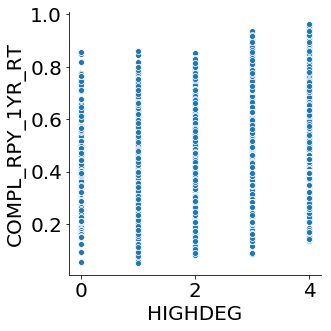

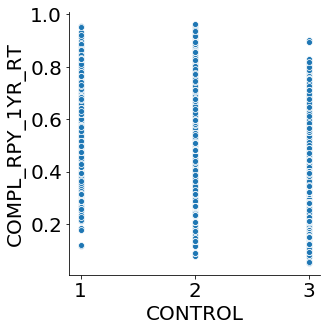

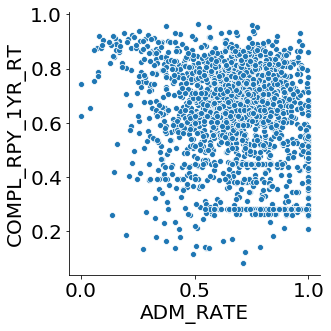

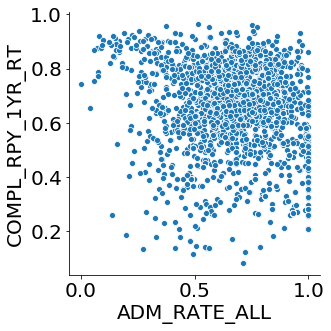

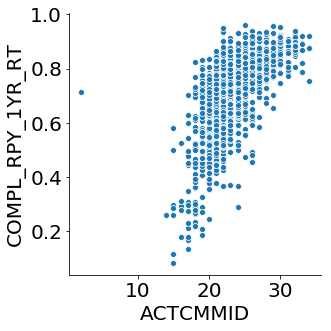

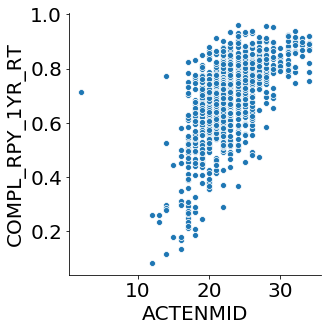

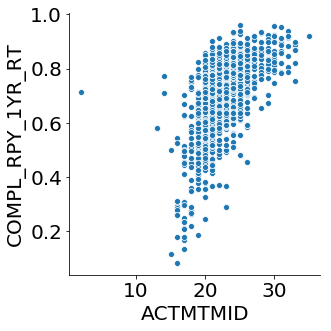

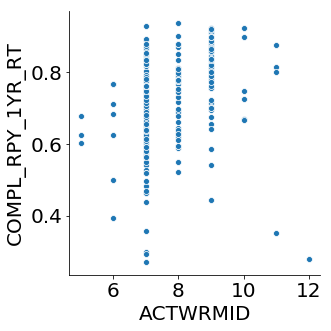

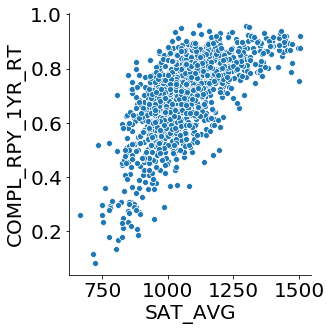

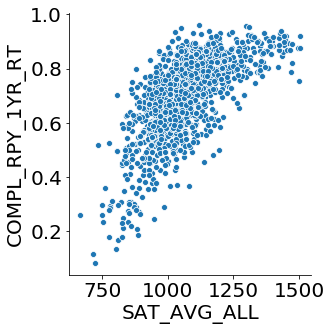

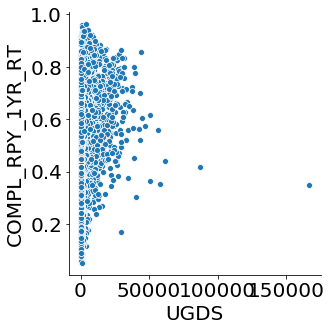

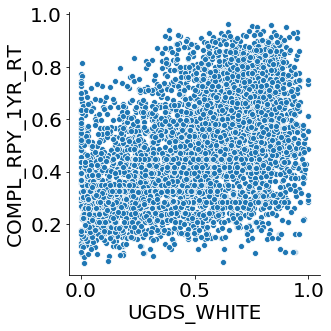

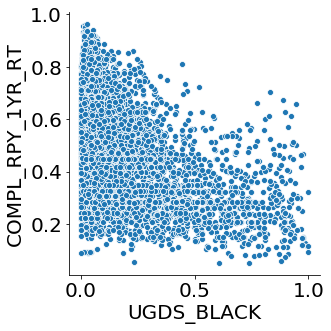

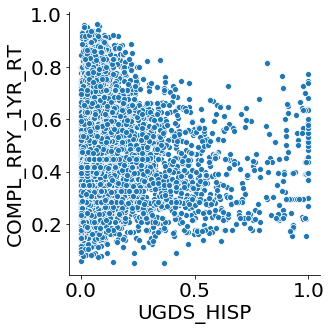

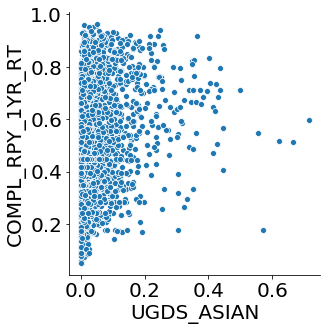

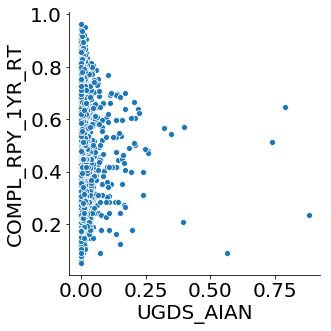

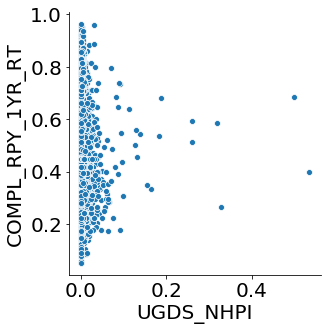

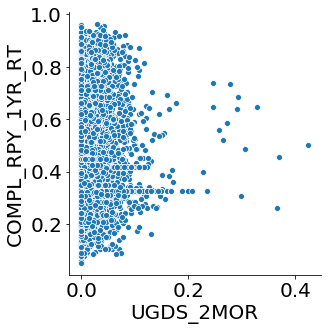

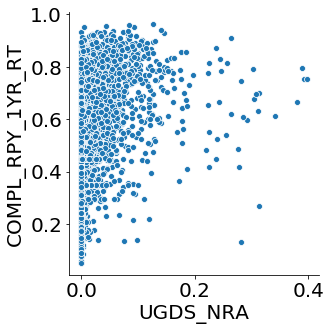

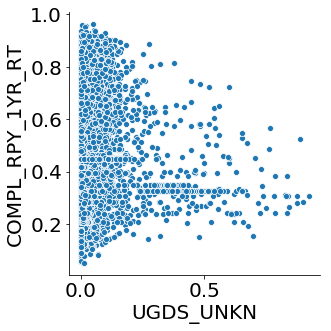

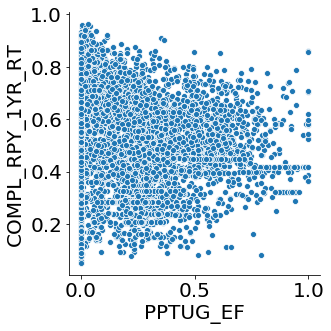

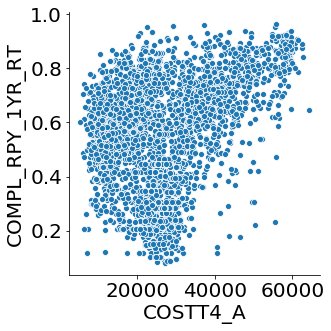

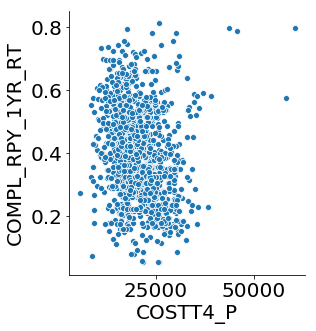

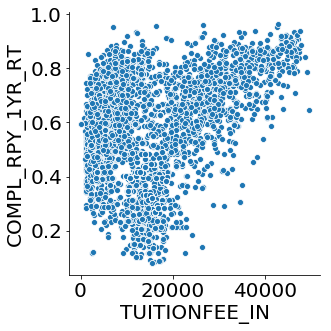

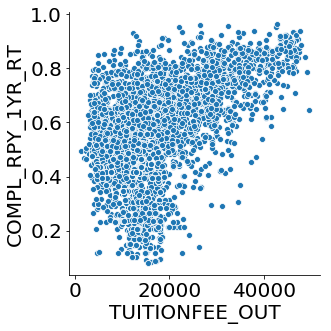

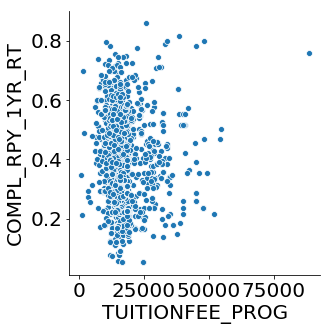

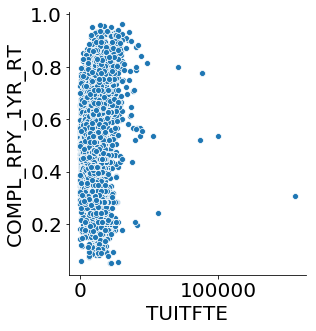

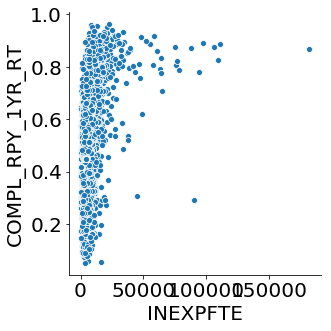

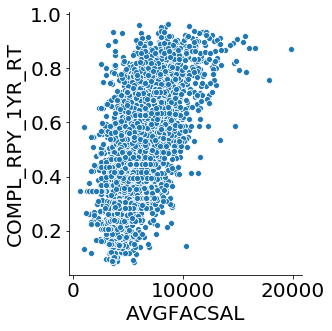

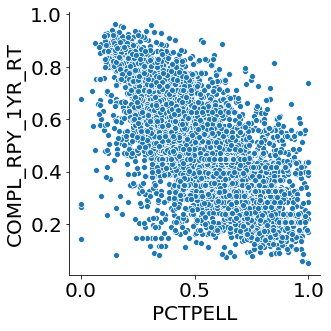

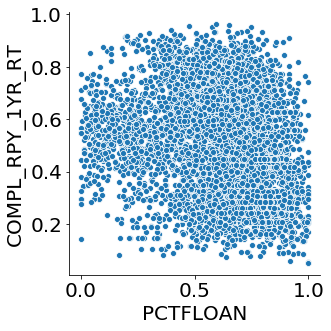

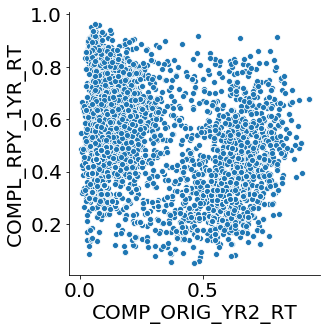

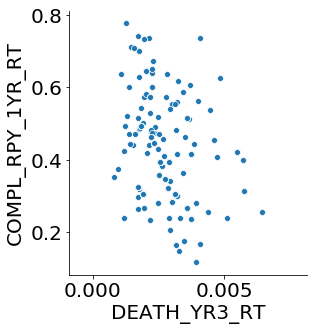

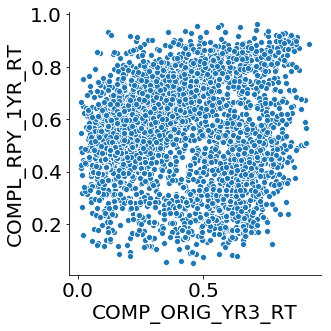

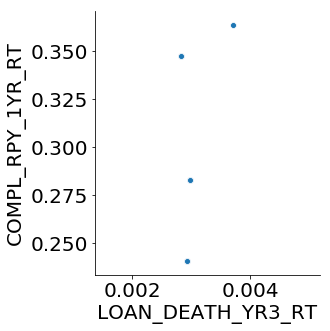

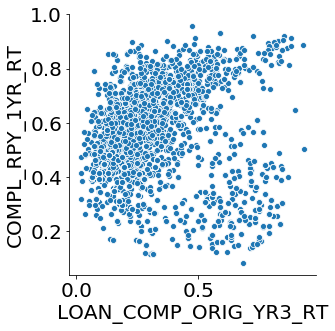

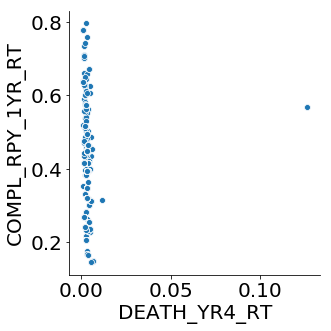

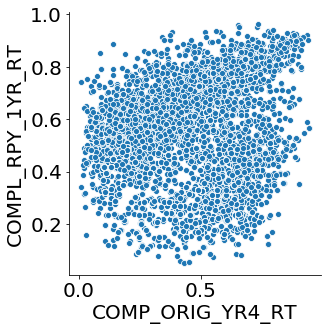

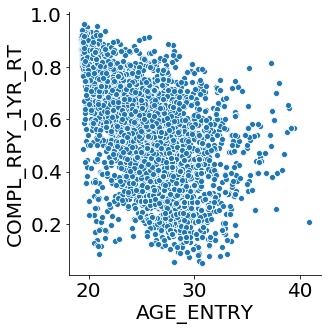

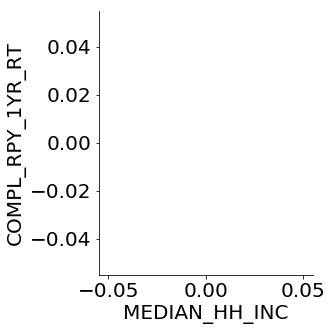

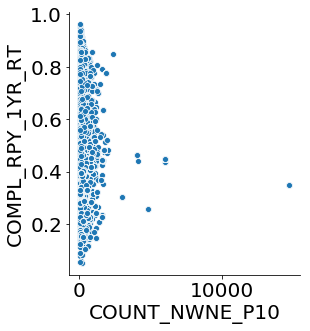

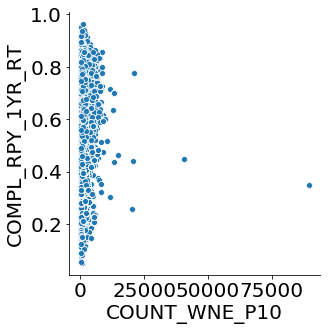

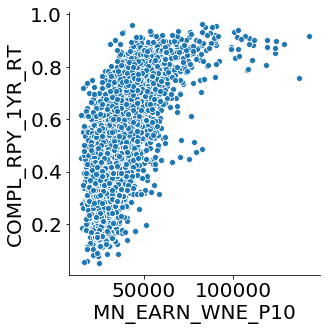

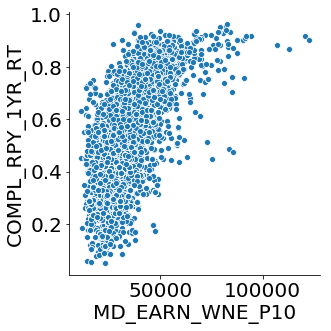

In [99]:
plotFeaturesTargetCorrelation(scoreCardDF,"COMPL_RPY_1YR_RT")

##### best target is : COMPL_RPY_1YR_RT

##### input candidates :
    PCTPELL              0.697547
    SAT_AVG_ALL          0.668902
    ACTCMMID             0.636761
    ACTMTMID             0.628290
    AVGFACSAL            0.607634
    ACTENMID             0.605319
    MD_EARN_WNE_P10      0.591054
    MN_EARN_WNE_P10      0.590682
    AGE_ENTRY            0.581915
    CONTROL              0.547110 (not a float column) 
    LOAN_DEATH_YR3_RT    0.536322 (not needed, because of target is repayment after 1 year)


#### Now, let's check the correlation between input features to see if we can drop som of them in case they are highly correlated

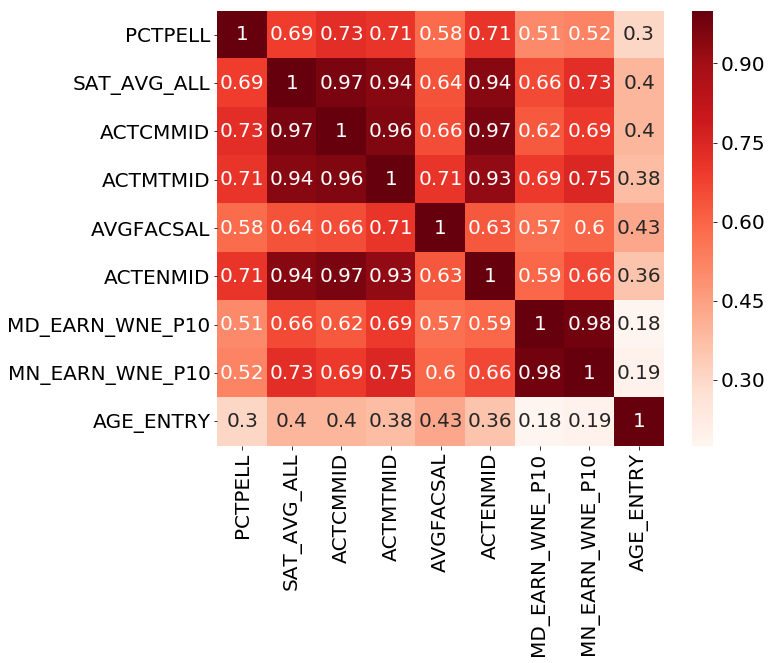

In [103]:
inputFeaturesDf = scoreCardDF[["PCTPELL","SAT_AVG_ALL","ACTCMMID","ACTMTMID","AVGFACSAL","ACTENMID","MD_EARN_WNE_P10","MN_EARN_WNE_P10","AGE_ENTRY"]]
sns.heatmap(abs(inputFeaturesDf.corr()), annot=True, cmap=plt.cm.Reds)
plt.show()

In [104]:
abs(inputFeaturesDf.corr())

,PCTPELL,SAT_AVG_ALL,ACTCMMID,ACTMTMID,AVGFACSAL,ACTENMID,MD_EARN_WNE_P10,MN_EARN_WNE_P10,AGE_ENTRY
PCTPELL,1.000000,0.689551,0.727193,0.712545,0.582757,0.711023,0.510096,0.522042,0.304576
SAT_AVG_ALL,0.689551,1.000000,0.965950,0.942930,0.640163,0.942858,0.656289,0.727378,0.396609
ACTCMMID,0.727193,0.965950,1.000000,0.956105,0.655063,0.965198,0.624096,0.694841,0.395460
ACTMTMID,0.712545,0.942930,0.956105,1.000000,0.707327,0.927563,0.694153,0.749443,0.376715
AVGFACSAL,0.582757,0.640163,0.655063,0.707327,1.000000,0.629210,0.572911,0.595697,0.430106
ACTENMID,0.711023,0.942858,0.965198,0.927563,0.629210,1.000000,0.593486,0.663551,0.358873
MD_EARN_WNE_P10,0.510096,0.656289,0.624096,0.694153,0.572911,0.593486,1.000000,0.983212,0.175314
MN_EARN_WNE_P10,0.522042,0.727378,0.694841,0.749443,0.595697,0.663551,0.983212,1.000000,0.189766
AGE_ENTRY,0.304576,0.396609,0.395460,0.376715,0.430106,0.358873,0.175314,0.189766,1.000000


### from results above, we can only start with 2 input features (SAT_AVG_ALL , AGE_ENTRY)

In [105]:
scoreCardDF[["SAT_AVG_ALL","AGE_ENTRY"]].corr()

,SAT_AVG_ALL,AGE_ENTRY
SAT_AVG_ALL,1.000000,-0.396609
AGE_ENTRY,-0.396609,1.000000


In [ ]:
#horizontal bat to find the most expensive institutes
costDf = scoreCardDF[['COSTT4_A']].sort_values(by='COSTT4_A',ascending=False).head(20)
ax = costDf.plot(kind='barh',title='Cost',legend=False)
ax.invert_yaxis()